In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Many functions for probability distributions in python are in scipy.stats
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
## load dataset
data = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
data.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
data.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

#### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?



In [6]:
## Summarize data set
data.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [8]:
## Count by Region
data['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [9]:
## Count by Channel
data['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [10]:
Spending = data.sum(axis=1)
Spending

0      34113
1      33268
2      36613
3      27385
4      46105
       ...  
435    73738
436    48809
437    77845
438    18273
439     8029
Length: 440, dtype: int64

In [11]:
## Add spending Column
data["Spending"] = Spending
data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34113
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33268
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36613
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27385
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46105
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73738
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48809
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77845
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,18273


In [12]:
## Group by Region and Channel
region_channel_spendings = data.groupby(['Region','Channel'])['Spending'].sum()
region_channel_spendings

Region  Channel
Lisbon  Hotel      1552368
        Retail      852540
Oporto  Hotel       728138
        Retail      841849
Other   Hotel      5790097
        Retail     4951528
Name: Spending, dtype: int64

#### Highest spend in the Region/Channel is from Others/Hotel
#### and lowest spend in the Region/Channel is from Oporto/Hotel


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
 9   Spending          440 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 34.5+ KB


#### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.



In [14]:
# Mean Annual Spend by Region and Channel
pd.pivot_table(data, index=['Region', 'Channel'])


Buyer/Spender  Delicatessen  Detergents_Paper         Fresh  \
Region Channel                                                                
Lisbon Hotel       237.728814   1197.152542        950.525424  12902.254237   
       Retail      226.055556   1871.944444       8225.277778   5200.000000   
Oporto Hotel       321.000000   1105.892857        482.714286  11650.535714   
       Retail      311.105263   1239.000000       8410.263158   7289.789474   
Other  Hotel       227.582938   1518.284360        786.682464  13878.052133   
       Retail      152.438095   1826.209524       6899.238095   9831.504762   

                     Frozen       Grocery          Milk      Spending  
Region Channel                                                         
Lisbon Hotel    3127.322034   4026.135593   3870.203390  26311.322034  
       Retail   2584.111111  18471.944444  10784.000000  47363.333333  
Oporto Hotel    5745.035714   4395.500000   2304.250000  26004.928571  
       Retail   1540.578947  16326.315789   9190.789474  44307.842105  
Other  Hotel    3656.900474   3886.734597   3486.981043  27441.218009  
       Retail   1513.200000  15953.809524  10981.009524  47157.409524

In [15]:
## Drop columns and categorise by product list
data.drop(columns =['Buyer/Spender', 'Spending'], axis = 1, inplace = True )
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [16]:
## Total sum of all products
data['Total'] = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(axis=1)
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [17]:
## Group by Region and Channel
results1 = data.groupby(['Region', 'Channel']).sum().reset_index()
results1

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,Hotel,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,1032308,1153006,1675150,158886,724420,191752,4935522


In [18]:
indices = [16, 112,200]
products = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("products from wholesale customers dataset:")
display(products)


products from wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,1020,8816,12121,134,4508,1080,27679
1,Hotel,Other,19046,2770,2469,8853,483,2708,36329
2,Retail,Lisbon,3067,13240,23127,3941,9959,731,54065


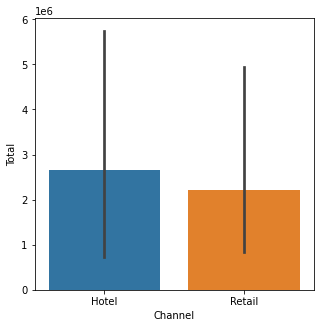

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [19]:
## Boxplot to visualise by Channel
plt.figure(figsize=(5,5))
sns.barplot(x=results1['Channel'], y=results1['Total'], data =results1);
plt.show()
data.groupby('Channel').sum().reset_index()


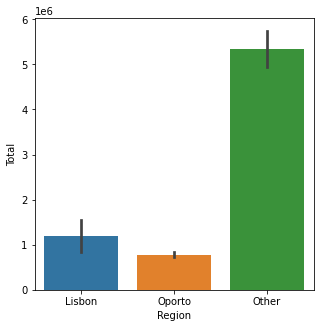

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [20]:
## Boxplot to visualise by Region 
plt.figure(figsize=(5,5))
sns.barplot(x=results1['Region'], y=results1['Total'], data =results1);
plt.show()
data.groupby('Region',).sum().reset_index()


In [21]:
## Descriptive Statastics of Data:
data.describe(include = 'all')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,298,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000


In [22]:
## Drop columns to get the product list

data.drop(columns=['Channel', 'Region', 'Total'], axis =1, inplace = True)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


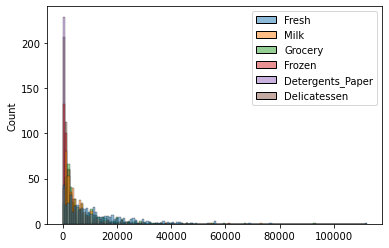

In [23]:
## Data visualisation

sns.histplot(data)
plt.show()


#### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?



In [24]:
data.sum()

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

In [25]:
data.max()

Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicatessen         47943
dtype: int64

In [26]:
data.min()

Fresh                3
Milk                55
Grocery              3
Frozen              25
Detergents_Paper     3
Delicatessen         3
dtype: int64

In [27]:
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [28]:
data.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

In [29]:
data.mode()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3.0,577.0,683.0,133.0,3,3.0
1,514.0,659.0,1493.0,364.0,20,834.0
2,3366.0,829.0,1563.0,402.0,56,NaN
3,7149.0,899.0,1664.0,425.0,69,NaN
4,8040.0,944.0,2062.0,744.0,70,NaN
5,9670.0,1012.0,2405.0,779.0,93,NaN
6,18044.0,1032.0,2406.0,824.0,96,NaN
7,NaN,1115.0,3600.0,830.0,118,NaN
8,NaN,1196.0,6536.0,848.0,153,NaN
9,NaN,1610.0,10391.0,937.0,182,NaN


In [30]:
data.std().round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

#### Fresh item have highest Standard of deviation, therefore they are Inconsistent.
#### Delicatessen item have smallest Standard of deviation, therefore they are consistent.


In [31]:
data.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

#### Fresh item have highest variance, therefore they are Inconsistent.
#### Delicatessen item have smallest variance, therefore they are consistent.


In [32]:
data.nunique()

Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicatessen        403
dtype: int64

In [33]:
## use standard deviation to check the measure of variabilty

standard_deviation_items = data.std()
standard_deviation_items.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

In [34]:
## Calculate interqurtile range

Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
Q3

Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Name: 0.75, dtype: float64

In [35]:
Q1

Fresh               3127.75
Milk                1533.00
Grocery             2153.00
Frozen               742.25
Detergents_Paper     256.75
Delicatessen         408.25
Name: 0.25, dtype: float64

In [36]:
IQR = Q3 - Q1
IQR

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64

In [37]:
## Calculation of upper and lower limit
upper_lim = Q3 + 1.5*IQR

print('upper_lim', upper_lim)

upper_lim Fresh               37642.750
Milk                15676.125
Grocery             23409.875
Frozen               7772.250
Detergents_Paper     9419.875
Delicatessen         3938.250
dtype: float64


In [38]:
lower_lim =  Q1 - 1.5*IQR
print('lower_lim:', lower_lim)

lower_lim: Fresh              -17581.250
Milk                -6952.875
Grocery            -10601.125
Frozen              -3475.750
Detergents_Paper    -5241.125
Delicatessen        -1709.750
dtype: float64


#### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.



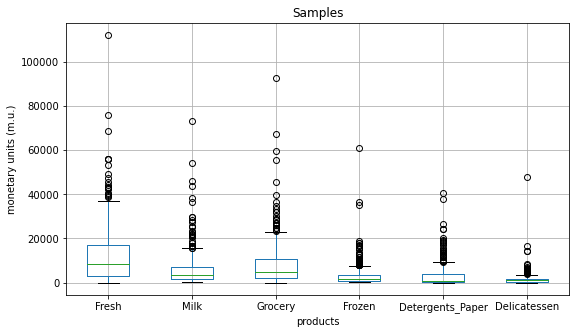

In [39]:
## To find outlier by plotting boxplot
plt.figure(figsize = (9, 5))
plt.title('Samples')
plt.xlabel("products")
plt.ylabel("monetary units (m.u.)")
data.boxplot() 
plt.show()

#### From the above boxplot we can see that there are outliers for all products

In [40]:
def detect_limits(col):
  sorted (col)
  Q1, Q3= np.percentile(col,[25,75])
  IQR = Q3 - Q1
  min = Q1 - (1.5 * IQR)
  max = Q3 + (1.5 * IQR)
  return min, max

In [41]:
detect_limits(data.Fresh)

(-17581.25, 37642.75)

In [42]:
lr, ur = detect_limits(data.Fresh)
data['Fresh'] = np.where(data['Fresh'] > ur, ur, data['Fresh'] )
data['Fresh'] = np.where(data['Fresh'] < lr, lr, data['Fresh'] )

In [43]:
for i in data: 
 lr, ur = detect_limits(data[i])
 data[i] = np.where(data[i] > ur, ur, data[i] )
 data[i] = np.where(data[i] < lr, lr, data[i] )

In [44]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


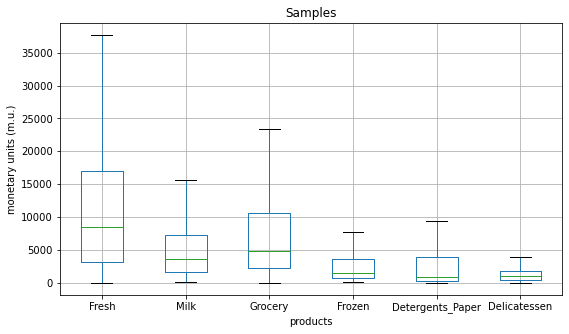

In [45]:
## To find outlier by plotting boxplot
plt.figure(figsize = (9, 5))
plt.title('Samples')
plt.xlabel("products")
plt.ylabel("monetary units (m.u.)")
data.boxplot() 
plt.show()

#### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective



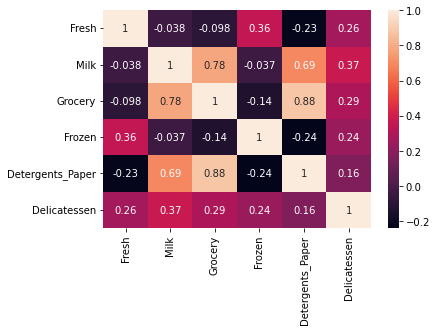

In [46]:
## Data visualisation using Heatmap

sns.heatmap(data.corr(), annot=True)
plt.show()

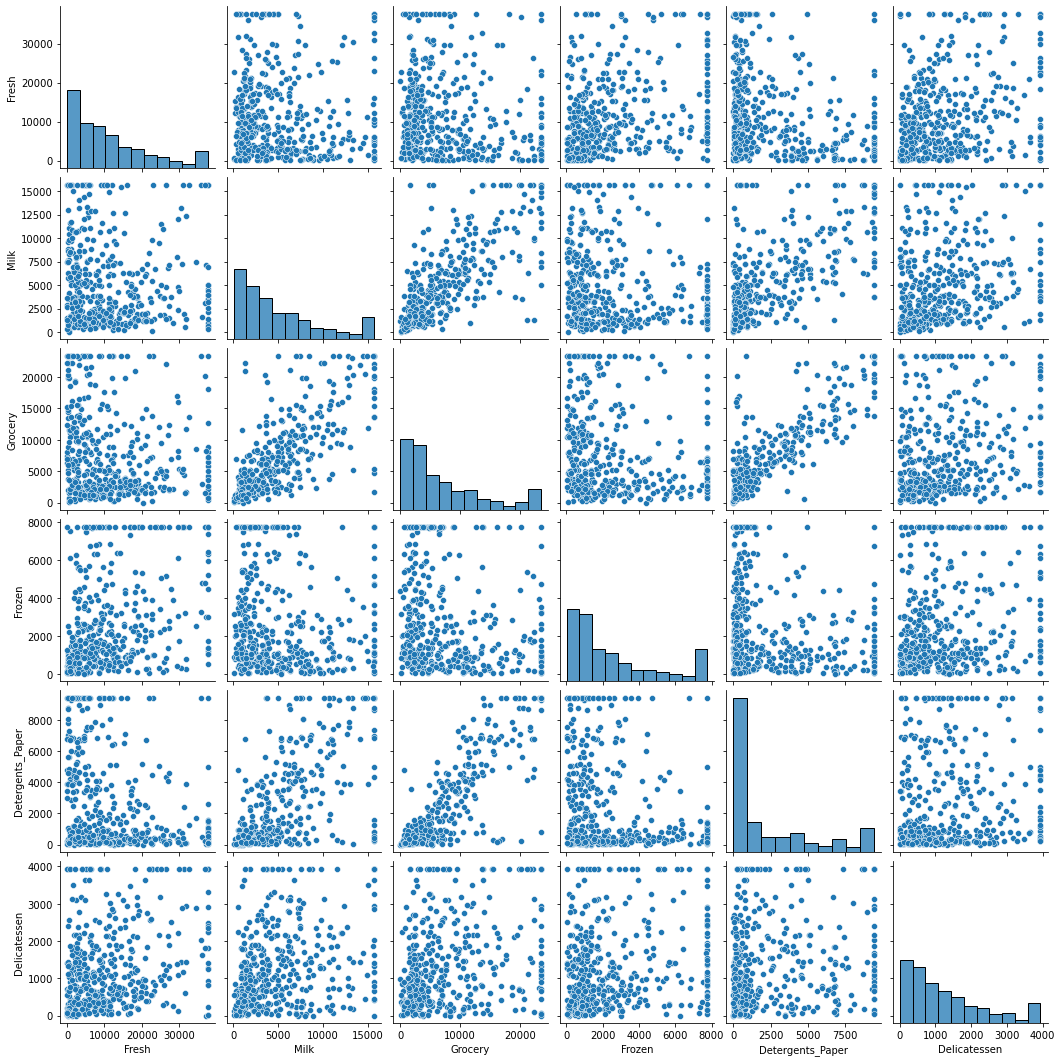

In [47]:
## Data visualisation using pairplot

sns.pairplot(data)
plt.show()

### Summary

#### Since, lowest spend in the Region/Channel is from Oporto/Hotel, they should advertise more in this Region/Channel so that more customers are attracted.

#### Since, Highest spend in the Region/Channel is from Others/Hotel, Fresh item have highest variance, therefore they are Inconsistent, so we need regular spending/expenditure of fresh item to generate revenue. Therefore advertise more for fresh items.
